<a href="https://colab.research.google.com/github/goyaldivyansh/Heart-disease-prediction-and-compared-accuracy-using-5-algorithms/blob/main/Investment_options_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np   #array lists in python
import pandas as pd 
import missingno as msno
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading data
from google.colab import drive
drive.mount('/content/drive')
invest_data = pd.read_csv('/content/drive/MyDrive/invest.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
invest_data.head()

GENDER  AGE Do you invest in Investment Avenues?  \
0    Male   61                                  Yes   
1  Female   43                                  Yes   
2  Female   24                                   No   
3  Female   48                                   No   
4  Female   24                                   No   

   What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
0                                                  4                                                               
1                                                  4                                                               
2                                                  4                                                               
3                                                  1                                                               
4                                                  4                                                               

   What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]  \
0                                                  1                                                                
1                                                  1                                                                
2                                                  3                                                                
3                                                  6                                                                
4                                                  1                                                                

   What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]  \
0                                                  7                                                             
1                                                  2                                                             
2                                                  2                                                             
3                                                  3                                                             
4                                                  5                                                             

   What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]  \
0                                                  5                                                                   
1                                                  3                                                                   
2                                                  6                                                                   
3                                                  2                                                                   
4                                                  2                                                                   

   What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]  \
0                                                  2                                                                 
1                                                  5                                                                 
2                                                  5                                                                 
3                                                  7                                                                 
4                                                  7                                                                 

   What do you think are the best options for investing your money? (Rank in order of preference) [Public Provident Fund]  \
0                               

In [ ]:
invest_data.tail()

GENDER  AGE Do you invest in Investment Avenues?  \
99995    Male   28                                  Yes   
99996  Female   59                                   No   
99997    Male   18                                   No   
99998  Female   65                                   No   
99999  Female   50                                   No   

       What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
99995                                                  5                                                               
99996                                                  4                                                               
99997                                                  2                                                               
99998                                                  1                                                               
99999                                                  1                                                               

       What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]  \
99995                                                  4                                                                
99996                                                  2                                                                
99997                                                  7                                                                
99998                                                  4                                                                
99999                                                  7                                                                

       What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]  \
99995                                                  1                                                             
99996                                                  7                                                             
99997                                                  5                                                             
99998                                                  7                                                             
99999                                                  2                                                             

       What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]  \
99995                                                  3                                                                   
99996                                                  5                                                                   
99997                                                  3                                                                   
99998                                                  2                                                                   
99999                                                  4                                                                   

       What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]  \
99995                                                  6                                                                 
99996                                                  6                                                                 
99997                                                  1                                                                 
99998                                                  3                                                                 
99999                                                  3                                                                 

       What do yo

In [ ]:
invest_data.describe()

AGE  \
count  100000.000000   
mean       41.545970   
std        13.858155   
min        18.000000   
25%        29.000000   
50%        42.000000   
75%        54.000000   
max        65.000000   

       What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
count                                      100000.000000                                                               
mean                                            4.009280                                                               
std                                             1.999393                                                               
min                                             1.000000                                                               
25%                                             2.000000                                                               
50%                                             4.000000                                                               
75%                                             6.000000                                                               
max                                             7.000000                                                               

       What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]  \
count                                      100000.000000                                                                
mean                                            3.996080                                                                
std                                             1.997815                                                                
min                                             1.000000                                                                
25%                                             2.000000                                                                
50%                                             4.000000                                                                
75%                                             6.000000                                                                
max                                             7.000000                                                                

       What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]  \
count                                       100000.00000                                                             
mean                                             3.99707                                                             
std                                              2.00042                                                             
min                                              1.00000                                                             
25%                                              2.00000                                                             
50%                                              4.00000                                                             
75%                                              6.00000                                                             
max                                              7.00000                                                             

       What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]  \
count                                       100000.00000                                                                   
mean                                             4.00333                                                                   
std                                              2.00430                                                                   
min                                              1.00000              

In [ ]:
invest_data.shape

(100000, 24)

In [ ]:
invest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                                                                                                                  Non-Null Count   Dtype 
---  ------                                                                                                                  --------------   ----- 
 0   GENDER                                                                                                                  100000 non-null  object
 1   AGE                                                                                                                     100000 non-null  int64 
 2   Do you invest in Investment Avenues?                                                                                    100000 non-null  object
 3   What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]           100000 non-null  int

In [ ]:
invest_data.isnull().sum()

GENDER                                                                                                                    0
AGE                                                                                                                       0
Do you invest in Investment Avenues?                                                                                      0
What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]             0
What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]            0
What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]               0
What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]         0
What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]           0
What do 

In [ ]:
fig = px.scatter (invest_data, x = "What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]", y = "What do you think are the best options for investing your money? (Rank in order of preference) [Gold]", color = "AGE", template = "plotly_dark",  trendline="lowess")
fig.show ()

In [ ]:
invest_data['What do you think are the best options for investing your money? (Rank in order of preference) [Gold]'].value_counts()

6    14396
3    14309
7    14299
4    14288
2    14285
1    14215
5    14208
Name: What do you think are the best options for investing your money? (Rank in order of preference) [Gold], dtype: int64

<Axes: >

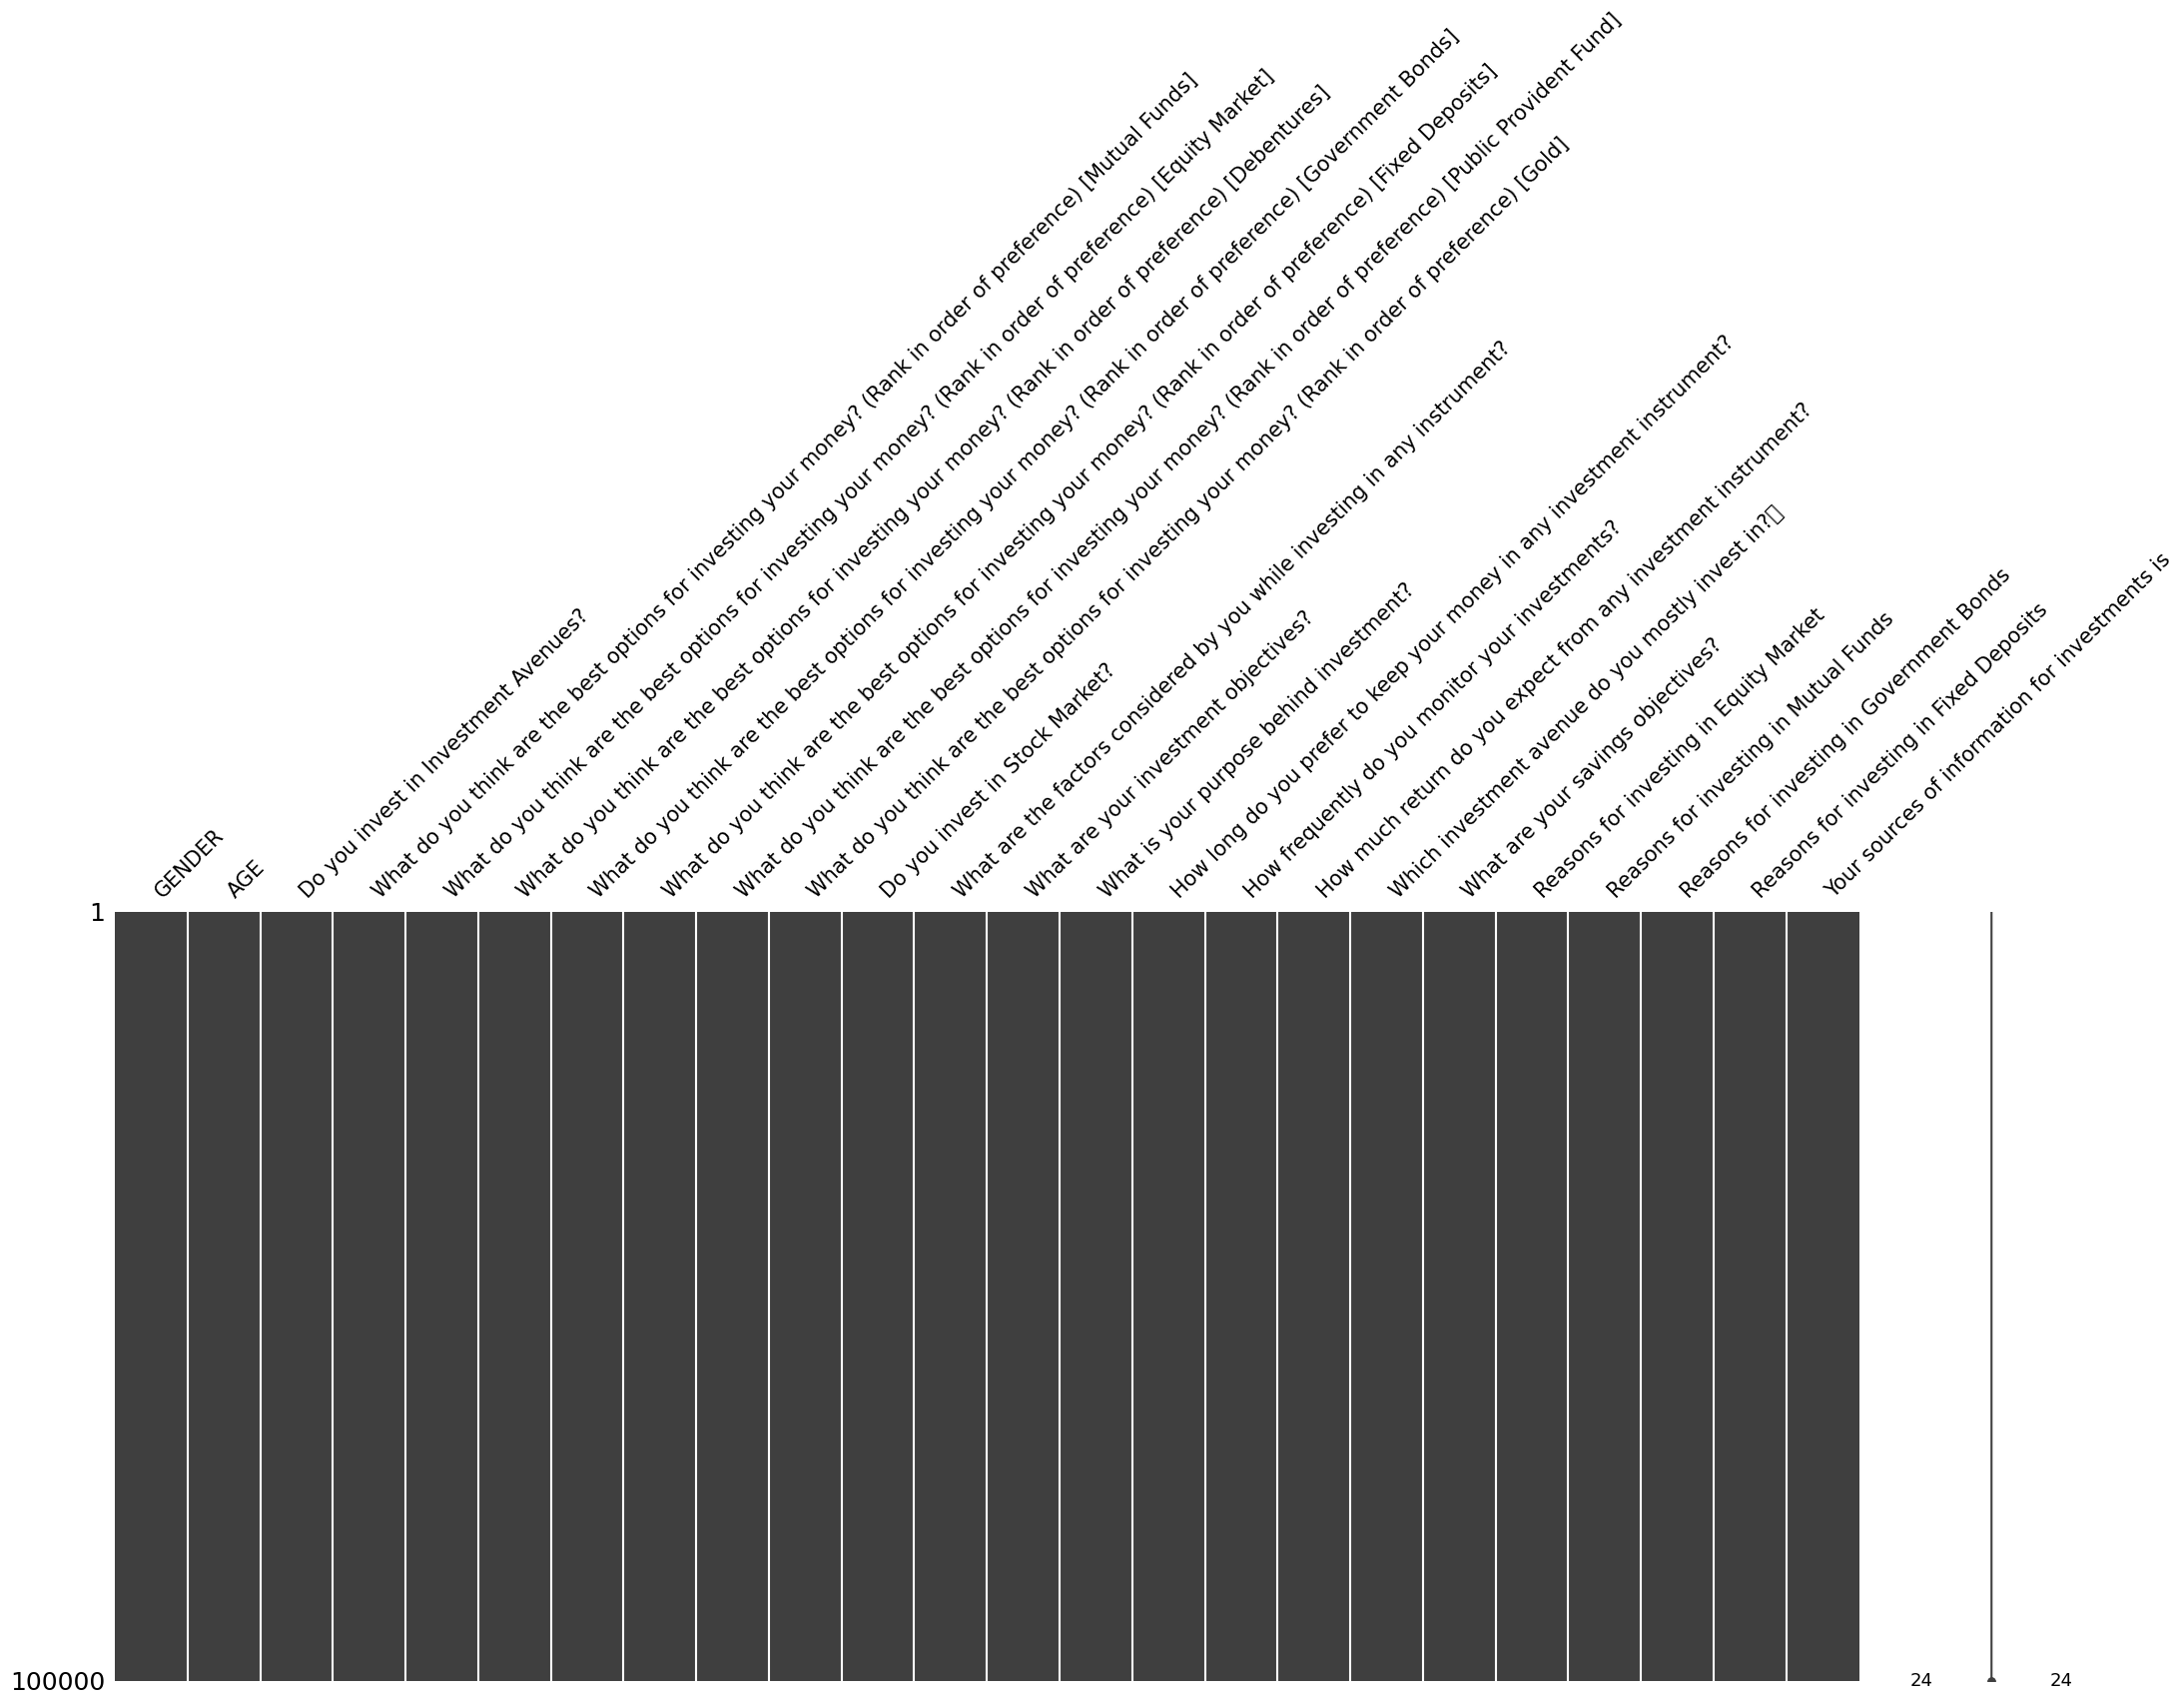

In [ ]:
msno.matrix(invest_data, fontsize=15)

In [ ]:
#sns.pairplot(invest_data, hue="Which investment avenue do you mostly invest in?")

In [ ]:
invest_data.rename(columns = {'Which investment avenue do you mostly invest in?\t':'Which investment avenue do you mostly invest in?'}, inplace = True)
  
# After renaming the columns
print("\nAfter modifying column:\n", invest_data.columns)


After modifying column:
 Index(['GENDER', 'AGE', 'Do you invest in Investment Avenues?',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Public Provident Fund]',
       'What do you think are the best options for investing your money? (Rank in order of preference) [Gold]',
       'Do you invest in Stock Market?',
       'What are the fa

In [ ]:
fig = px.histogram(invest_data, x='Which investment avenue do you mostly invest in?')
fig.update_layout(
    title_text='Investment distribution', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
)
fig.show()

<Axes: xlabel='AGE', ylabel='Which investment avenue do you mostly invest in?'>

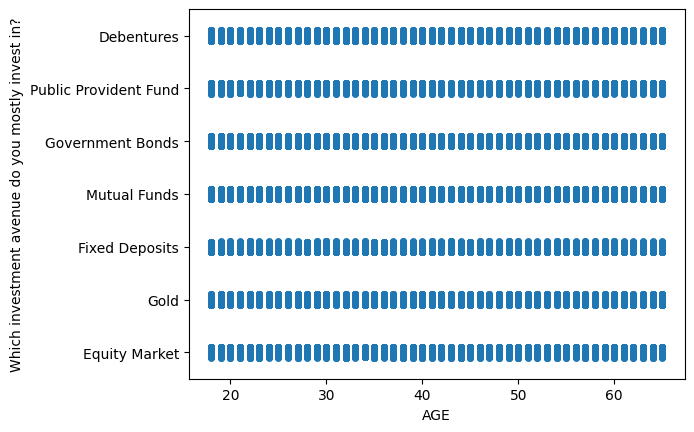

In [ ]:
sns.stripplot(x='AGE', y='Which investment avenue do you mostly invest in?', data=invest_data)

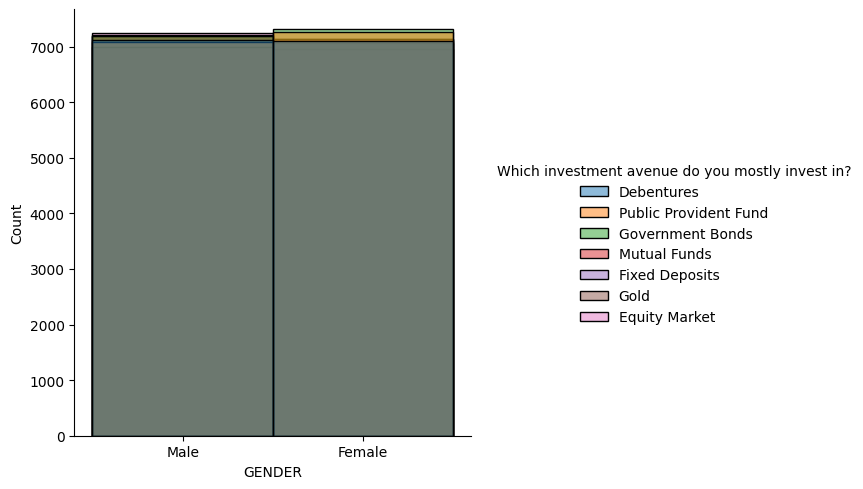

In [ ]:
sns.displot(x="GENDER",data=invest_data, hue="Which investment avenue do you mostly invest in?")

<Axes: >

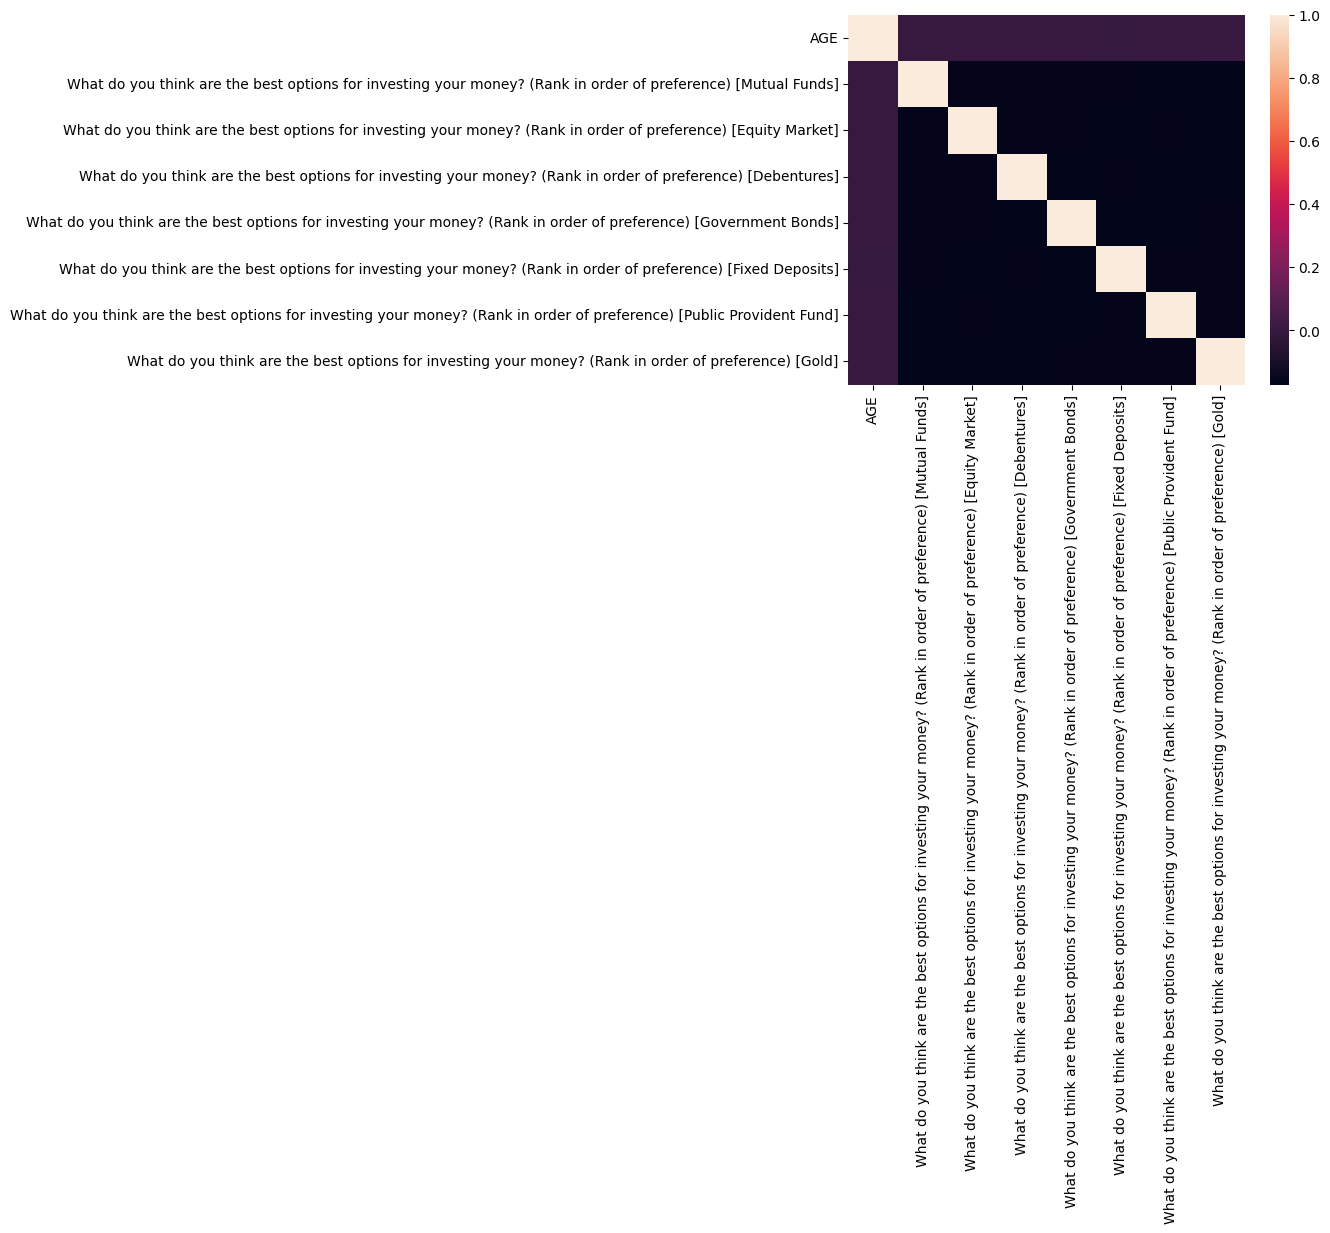

In [ ]:
sns.heatmap(invest_data.corr())

In [ ]:
fig = px.histogram (invest_data, x = "AGE",  facet_row = "Which investment avenue do you mostly invest in?",  template = 'plotly_dark')
fig.show ()

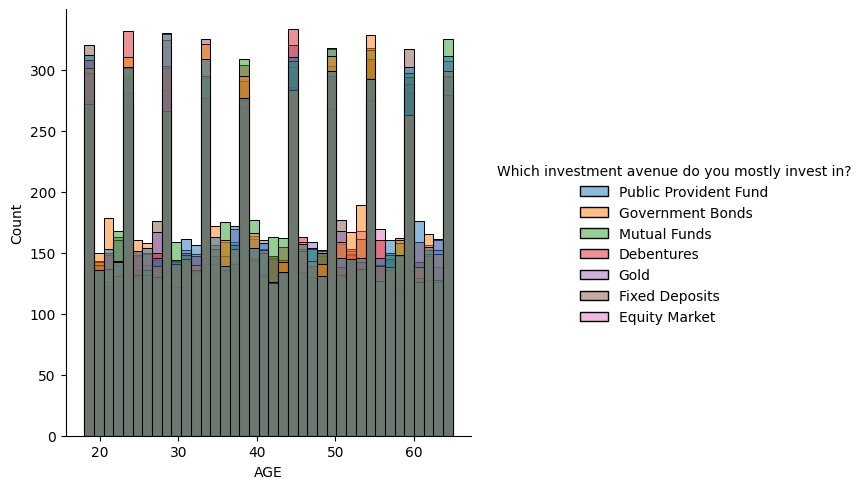

In [ ]:
sns.displot(x='AGE',data=invest_data[invest_data['GENDER']=='Female'],hue='Which investment avenue do you mostly invest in?')


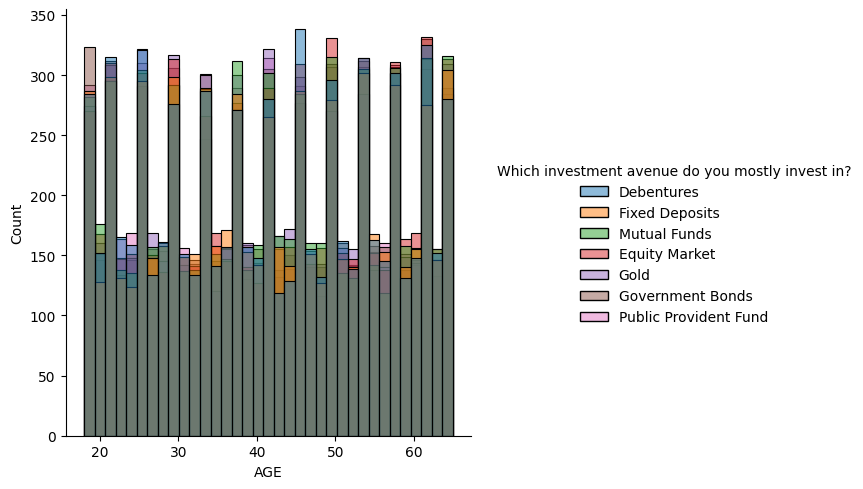

In [ ]:
sns.displot(x='AGE',data=invest_data[invest_data['GENDER']=='Male'],hue='Which investment avenue do you mostly invest in?')


<Axes: xlabel='Which investment avenue do you mostly invest in?', ylabel='AGE'>

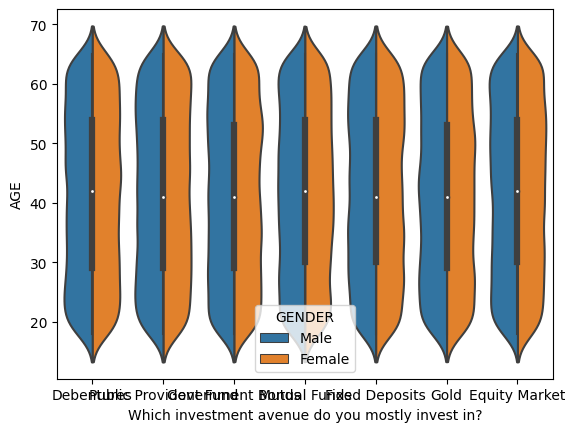

In [ ]:
sns.violinplot(x='Which investment avenue do you mostly invest in?', y='AGE', data=invest_data,
               hue='GENDER', split=True)

### DATA PRE


In [ ]:
# encoding sex column
invest_data.replace({'GENDER':{'Male':0,'Female':1}}, inplace=True)

3 # encoding 'smoker' column
invest_data.replace({'Do you invest in Investment Avenues?':{'Yes':0,'No':1}}, inplace=True)

# encoding 'region' column
invest_data.replace({'Do you invest in Stock Market?':{'Yes':0,'No':1}}, inplace=True)

invest_data.replace({'Your sources of information for investments is':{"Newspapers and Magazines": 0,"Internet": 1,"Financial Consultants": 2,"Television": 3,"Friends and Family": 4}}, inplace=True)

invest_data.replace({'Reasons for investing in Fixed Deposits':{
    "Risk Free": 0,
    "High Interest Rates": 1,
    "Fixed Returns": 2
}
}, inplace=True)

invest_data.replace({'Reasons for investing in Government Bonds':{
    "Safe Investment": 0,
    "Tax Incentives": 1 , 
    "Assured Returns":2
}
}, inplace=True)

invest_data.replace({'Reasons for investing in Mutual Funds':{
    "Better Returns": 0,
    "Tax Benefits": 1,
    "Fund Diversification": 2
}
}, inplace=True)

invest_data.replace({'Reasons for investing in Equity Market':{
    "Capital Appreciation": 0,
    "Dividend": 1,
    "Liquidity": 2
}
}, inplace=True)

invest_data.replace({'What are your savings objectives?':{
    "Retirement Plan": 0,
    "Health Care": 1,
    "Education": 2
}
}, inplace=True)

invest_data.replace({'Which investment avenue do you mostly invest in?':{
"Mutual Funds": 0,
"Equity Market": 1,
"Debentures": 2,
"Government Bonds": 3,
"Fixed Deposits": 4,
"Public Provident Fund": 5,
"Gold": 6 , 
"Real Estate": 7 ,
"Cryptocurrency": 8
}
}, inplace=True)

invest_data.replace({'How much return do you expect from any investment instrument?':{
"10%-20%": 0,
"20%-30%": 1,
"30%-40%": 2
}
}, inplace=True)

invest_data.replace({'How frequently do you monitor your investments?':{
"Daily": 0,
"Weekly": 1,
"Monthly": 2,
"Quarterly": 3,
"Yearly": 4
}
}, inplace=True)

invest_data.replace({'How long do you prefer to keep your money in any investment instrument?':{
"Less than 1 year": 0,
"1-3 years": 1,
"3-5 years": 2,
"More than 5 years": 3
}
}, inplace=True)

invest_data.replace({'What is your purpose behind investment?':{
"Wealth Creation": 0,
"Savings for Future": 1,
"Returns": 2
}
}, inplace=True)

invest_data.replace({'What are your investment objectives?':{
"Capital Appreciation": 0,
"Income": 1,
"Growth": 2
}
}, inplace=True)

invest_data.replace({'What are the factors considered by you while investing in any instrument?':{
"Returns": 0,
"Locking Period": 1,
"Risk": 2
}
}, inplace=True)

invest_data.replace({'Do you invest in Stock Market?':{'Yes':0,'No':1}
}, inplace=True)




In [ ]:
invest_data.head()

GENDER  AGE  Do you invest in Investment Avenues?  \
0       0   61                                     0   
1       1   43                                     0   
2       1   24                                     1   
3       1   48                                     1   
4       1   24                                     1   

   What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
0                                                  4                                                               
1                                                  4                                                               
2                                                  4                                                               
3                                                  1                                                               
4                                                  4                                                               

   What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]  \
0                                                  1                                                                
1                                                  1                                                                
2                                                  3                                                                
3                                                  6                                                                
4                                                  1                                                                

   What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]  \
0                                                  7                                                             
1                                                  2                                                             
2                                                  2                                                             
3                                                  3                                                             
4                                                  5                                                             

   What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]  \
0                                                  5                                                                   
1                                                  3                                                                   
2                                                  6                                                                   
3                                                  2                                                                   
4                                                  2                                                                   

   What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]  \
0                                                  2                                                                 
1                                                  5                                                                 
2                                                  5                                                                 
3                                                  7                                                                 
4                                                  7                                                                 

   What do you think are the best options for investing your money? (Rank in order of preference) [Public Provident Fund]  \
0                         

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
invest_data['Which investment avenue do you mostly invest in?'].value_counts()

3    14498
5    14332
0    14327
6    14289
2    14215
1    14212
4    14127
Name: Which investment avenue do you mostly invest in?, dtype: int64

In [ ]:
#splitting features
X = invest_data.drop('Which investment avenue do you mostly invest in?',axis=1)    #axis=1 when dropping column       
y = invest_data['Which investment avenue do you mostly invest in?']   
print(X)

       GENDER  AGE  Do you invest in Investment Avenues?  \
0           0   61                                     0   
1           1   43                                     0   
2           1   24                                     1   
3           1   48                                     1   
4           1   24                                     1   
...       ...  ...                                   ...   
99995       0   28                                     0   
99996       1   59                                     1   
99997       0   18                                     1   
99998       1   65                                     1   
99999       1   50                                     1   

       What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
0                                                      4                                                               
1                                      

In [ ]:
print(y)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3,random_state=42)
print(X.shape , X_train.shape , X_test.shape)

(100000, 23) (70000, 23) (30000, 23)


In [ ]:
len(X_train), len(X_test)

(70000, 30000)

### **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
#accuracy on testing 
X_test_prediction_rf = rf.predict(X_test)
testing_data_accuracy_rf = accuracy_score(X_test_prediction_rf, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_rf)

Accuracy on Testing Data: 0.14143333333333333


In [ ]:
#accuracy on training 
X_train_prediction_rf = rf.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, y_train)
print('Accuracy on Training Data:', training_data_accuracy_rf)

Accuracy on Training Data: 1.0


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#accuracy on training 
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, y_train)
print('Accuracy on Training Data:', training_data_accuracy_knn)

Accuracy on Training Data: 0.4035714285714286


In [ ]:
#accuracy on testing 
X_test_prediction_knn = knn.predict(X_test)
testing_data_accuracy_knn = accuracy_score(X_test_prediction_knn, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_knn)

Accuracy on Testing Data: 0.14476666666666665


### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#accuracy on training 
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training Data:', training_data_accuracy)

Accuracy on Training Data: 0.15062857142857142


In [ ]:
#accuracy on testing
X_test_prediction = lr.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy)

Accuracy on Testing Data: 0.14446666666666666


### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#accuracy on training 
X_train_prediction_dt = dt.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, y_train)
print('Accuracy on Training Data:', training_data_accuracy_dt)

Accuracy on Training Data: 1.0


In [ ]:
#accuracy on testing 
X_test_prediction_dt = dt.predict(X_test)
testing_data_accuracy_dt = accuracy_score(X_test_prediction_dt, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_dt)

Accuracy on Testing Data: 0.1461


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
#accuracy on training 
X_train_prediction_nb_classifier = nb_classifier.predict(X_train)
training_data_accuracy_nb_classifier = accuracy_score(X_train_prediction_nb_classifier, y_train)
print('Accuracy on Training Data:', training_data_accuracy_nb_classifier)

Accuracy on Training Data: 0.15317142857142857


In [ ]:
#accuracy on testing 
X_test_prediction_nb_classifier = nb_classifier.predict(X_test)
testing_data_accuracy_nb_classifier = accuracy_score(X_test_prediction_nb_classifier, y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_nb_classifier)

Accuracy on Testing Data: 0.14323333333333332


In [ ]:
input_data=(0,34,0,1,8,6,4,5,7,3,2,9,0,2,1,0,3,3,2,0,0,1,0,1,1)
#change input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping numpy array for predicting only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print ("Mutual Funds")
elif(prediction[0]==1):
    print('Equity Market')
elif(prediction[0]==2):
    print('Debentures')
elif(prediction[0]==3):
    print('Government Bonds')
elif(prediction[0]==4):
    print('Fixed Deposits')
elif(prediction[0]==5):
    print('Public Provident Fund')
elif(prediction[0]==6):
    print('Gold')
elif(prediction[0]==7):
    print('Real Estate')
elif(prediction[0]==8):
    print('Cryptocurrency')


ValueError: ignored

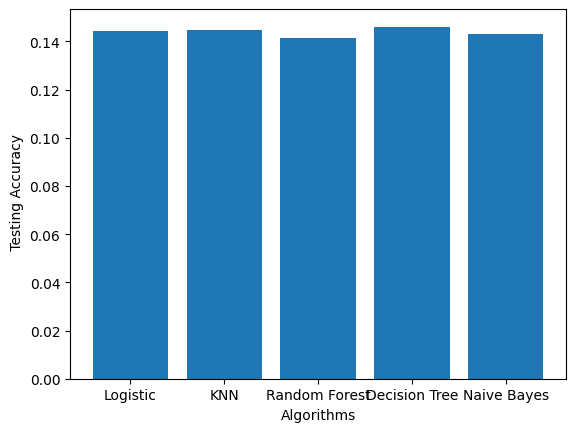

In [ ]:
plt.bar(['Logistic','KNN','Random Forest','Decision Tree','Naive Bayes'],[testing_data_accuracy,testing_data_accuracy_knn,testing_data_accuracy_rf,testing_data_accuracy_dt,testing_data_accuracy_nb_classifier])
plt.xlabel("Algorithms")
plt.ylabel(" Testing Accuracy")
plt.show()

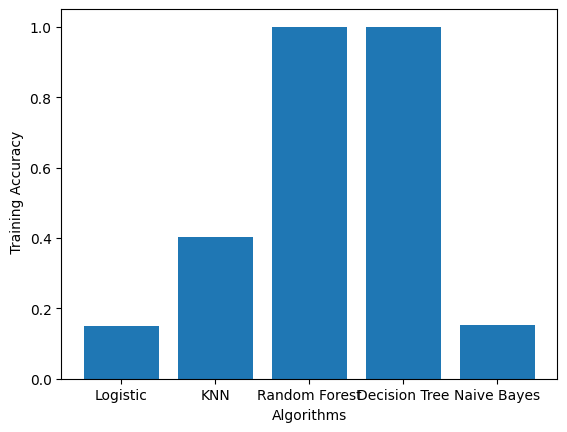

In [ ]:
plt.bar(['Logistic','KNN','Random Forest','Decision Tree','Naive Bayes'],[training_data_accuracy,training_data_accuracy_knn,training_data_accuracy_rf,training_data_accuracy_dt,training_data_accuracy_nb_classifier])
plt.xlabel("Algorithms")
plt.ylabel(" Training Accuracy")
plt.show()

In [ ]:
a = invest_data.iloc[:,np.r_[1:5,9:11,13:15]].values
b = invest_data.iloc[:,12].values

print(a)

[[61 'Yes' 4 ... 'Yes' 'Returns' '3-5 years']
 [43 'Yes' 4 ... 'Yes' 'Savings for Future' '3-5 years']
 [24 'No' 4 ... 'Yes' 'Returns' 'Less than 1 year']
 ...
 [18 'No' 2 ... 'Yes' 'Returns' 'Less than 1 year']
 [65 'No' 1 ... 'No' 'Savings for Future' '1-3 years']
 [50 'No' 1 ... 'Yes' 'Returns' 'More than 5 years']]


In [ ]:
print(b)

['Capital Appreciation' 'Income' 'Capital Appreciation' ... 'Income'
 'Growth' 'Capital Appreciation']


In [ ]:
print("per of missing gender is %2f%%" %((invest_data['GENDER'].isnull().sum()/invest_data.shape[0])*100))

per of missing gender is 0.000000%


Number of people who invest as group by Gender:
Male      50037
Female    49963
Name: GENDER, dtype: int64


<Axes: xlabel='GENDER', ylabel='count'>

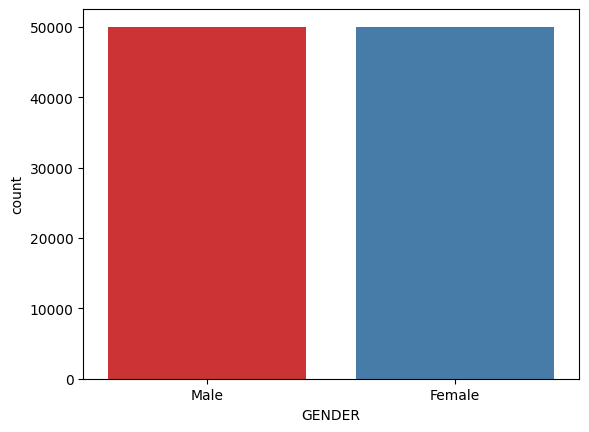

In [ ]:
print("Number of people who invest as group by Gender:")
print(invest_data['GENDER'].value_counts())
sns.countplot(x='GENDER', data=invest_data, palette = 'Set1')

Total number of purposes behind investment?:
Wealth Creation       33372
Savings for Future    33331
Returns               33297
Name: What is your purpose behind investment?, dtype: int64


<Axes: xlabel='What is your purpose behind investment?', ylabel='count'>

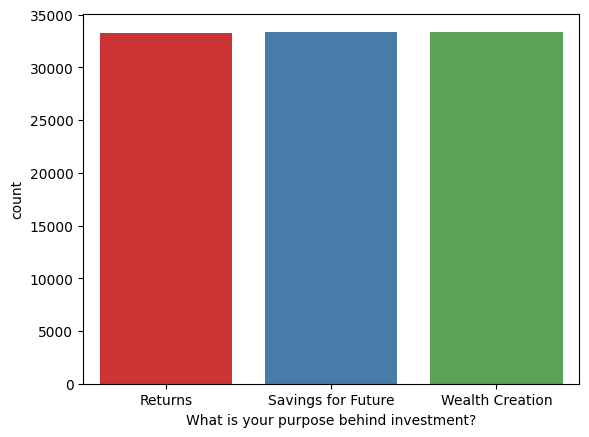

In [ ]:
print("Total number of purposes behind investment?:")
print(invest_data['What is your purpose behind investment?'].value_counts())
sns.countplot(x='What is your purpose behind investment?', data=invest_data, palette = 'Set1')

In [ ]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_a = LabelEncoder()

In [ ]:
for i in range(0,5):
  a_train[:,i] = Labelencoder_a.fit_transform(a_train[:,i])
  a_train[:,7] = Labelencoder_a.fit_transform(a_train[:,7])

a_train

array([[20, 1, 0, ..., 'Yes', 'Wealth Creation', 3],
       [28, 0, 6, ..., 'Yes', 'Wealth Creation', 3],
       [39, 1, 1, ..., 'No', 'Returns', 1],
       ...,
       [24, 1, 2, ..., 'No', 'Returns', 0],
       [35, 0, 3, ..., 'No', 'Wealth Creation', 3],
       [45, 0, 3, ..., 'Yes', 'Returns', 3]], dtype=object)

In [ ]:
Labelencoder_b = LabelEncoder()
b_train = Labelencoder_b.fit_transform(b_train)

b_train

array([2, 1, 2, ..., 0, 1, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(a_train, b_train)

In [ ]:
from sklearn import metrics 
b_pred = rf_clf.predict(a_test)

print("accuracy of random forest clf is", metrics.accuracy_score(b_pred, b_test))

b_pred

In [ ]:
a_train_prediction = rf_clf.predict(a_train)
training_data_accuracy = accuracy_score(a_train_prediction, b_train)
print('Accuracy on Training Data:', training_data_accuracy)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(a_train, b_train)

In [ ]:
b_pred = nb_classifier.predict(a_test)
print("acc of gaussianNB is %.", metrics.accuracy_score(b_pred, b_test))

In [ ]:
a_train_prediction = nb_classifier.predict(a_train)
training_data_accuracy = accuracy_score(a_train_prediction, b_train)
print('Accuracy on Training Data:', training_data_accuracy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(a_train, b_train)

In [ ]:
b_pred = dt_clf.predict(a_test)
print("Accuracy of Decision Tree is", metrics.accuracy_score(b_pred, b_test))

In [ ]:
a_train_prediction = dt_clf.predict(a_train)
training_data_accuracy = accuracy_score(a_train_prediction, b_train)
print('Accuracy on Training Data:', training_data_accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(a_train, b_train)

In [ ]:
b_pred = kn_clf.predict(a_test)
print("Accuracy of KN is", metrics.accuracy_score(b_pred, b_test))

In [ ]:
a_train_prediction = kn_clf.predict(a_train)
training_data_accuracy = accuracy_score(a_train_prediction, b_train)
print('Accuracy on Training Data:', training_data_accuracy)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(a_train, b_train)

In [ ]:
b_pred = nb_classifier.predict(a_test)
print("Accuracy of gaussian Naive Bayes is %.", metrics.accuracy_score(a_pred, b_test))

In [ ]:
a_train_prediction = nb_classifier.predict(a_train)
training_data_accuracy = accuracy_score(a_train_prediction, b_train)
print('Accuracy on Training Data:', training_data_accuracy)